# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        response.raise_for_status()
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | kondopoga
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | slave lake
Processing Record 5 of Set 1 | as sulayyil
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | bad bentheim
Processing Record 10 of Set 1 | neryungri
Processing Record 11 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 12 of Set 1 | aligudarz
Processing Record 13 of Set 1 | chibougamau
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | touros
Processing Record 16 of Set 1 | nuku'alofa
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | nikolayevsk-on-amure
Processing Record 19 of Set 1 | cromer
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | badger
Processing Record 2

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,12.36,93,100,0.89,US,1746363667
1,kondopoga,62.2057,34.2614,9.32,38,99,4.43,RU,1746363866
2,margaret river,-33.9500,115.0667,17.85,66,99,4.67,AU,1746363868
3,slave lake,55.2834,-114.7690,8.99,37,100,6.69,CA,1746363869
4,as sulayyil,20.4607,45.5779,39.80,6,100,5.09,SA,1746363870


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,12.36,93,100,0.89,US,1746363667
1,kondopoga,62.2057,34.2614,9.32,38,99,4.43,RU,1746363866
2,margaret river,-33.9500,115.0667,17.85,66,99,4.67,AU,1746363868
3,slave lake,55.2834,-114.7690,8.99,37,100,6.69,CA,1746363869
4,as sulayyil,20.4607,45.5779,39.80,6,100,5.09,SA,1746363870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

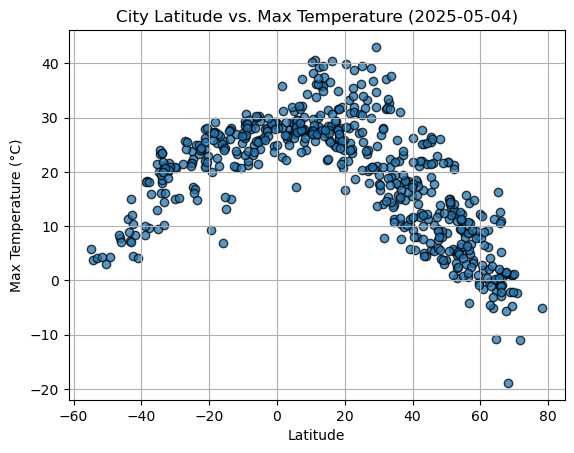

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2025-05-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

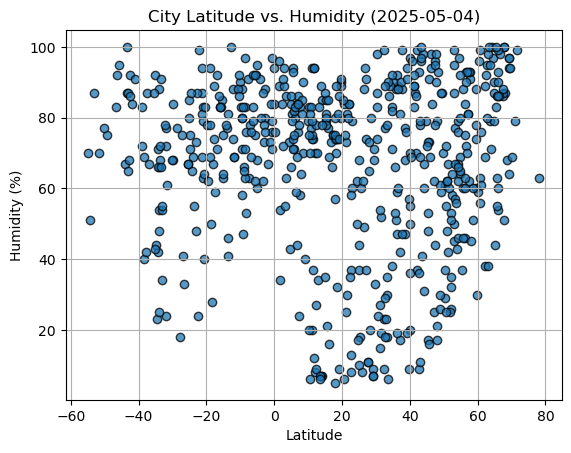

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2025-05-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

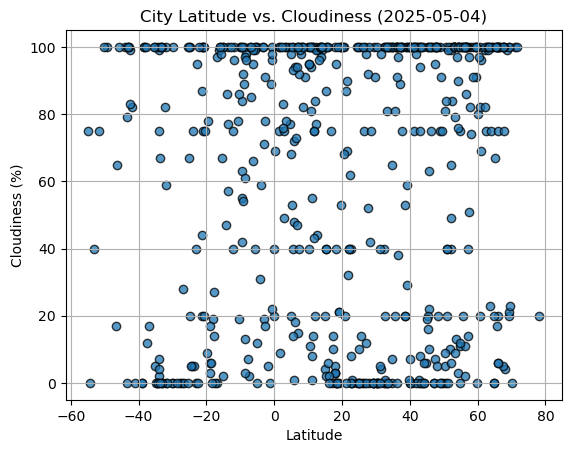

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2025-05-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

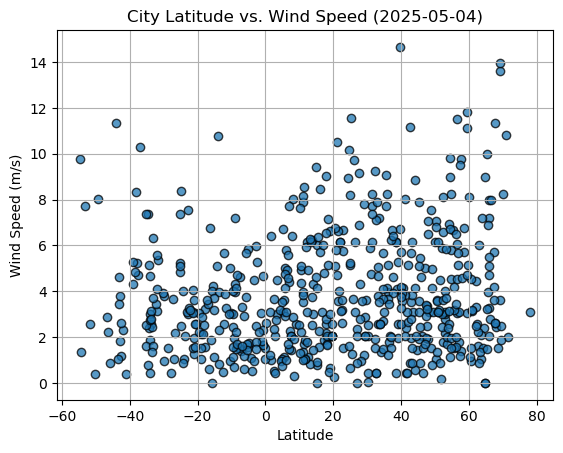

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2025-05-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Print r-value
    print(f"The r-value is: {rvalue:.3f}")
    
    # Show plot
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,12.36,93,100,0.89,US,1746363667
1,kondopoga,62.2057,34.2614,9.32,38,99,4.43,RU,1746363866
3,slave lake,55.2834,-114.7690,8.99,37,100,6.69,CA,1746363869
4,as sulayyil,20.4607,45.5779,39.80,6,100,5.09,SA,1746363870
5,yellowknife,62.4560,-114.3525,-0.33,92,75,2.57,CA,1746363871


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,margaret river,-33.9500,115.0667,17.85,66,99,4.67,AU,1746363868
13,touros,-5.1989,-35.4608,30.36,60,12,5.84,BR,1746363882
14,nuku'alofa,-21.1333,-175.2000,24.19,83,75,3.60,TO,1746363638
15,carnarvon,-24.8667,113.6333,22.38,71,100,8.37,AU,1746363884
20,plettenberg bay,-34.0527,23.3716,19.77,48,2,1.88,ZA,1746363889


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.842


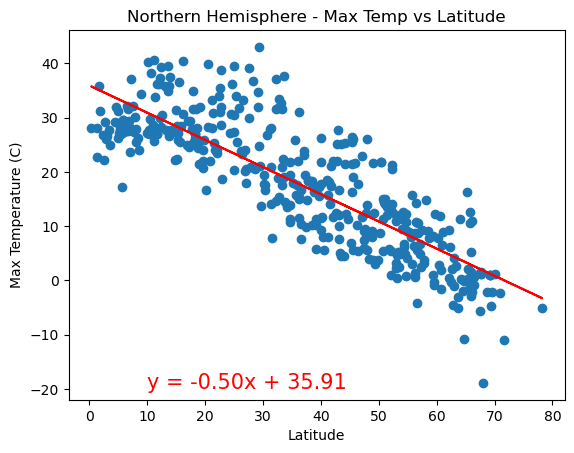

In [30]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                     "Northern Hemisphere - Max Temp vs Latitude",
                     "Latitude", "Max Temperature (C)", (10, -20))

The r-value is: 0.804


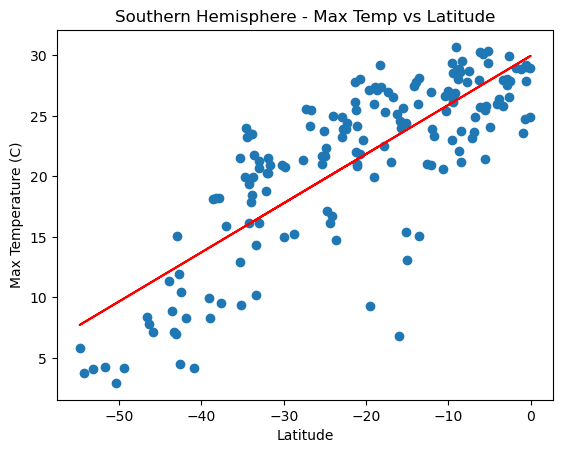

In [29]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                     "Southern Hemisphere - Max Temp vs Latitude",
                     "Latitude", "Max Temperature (C)", (-60, 30))

**Discussion about the linear relationship:** 
The Northern Hemisphere shows a negative Slope. As latitude increases, the maximum temperature tends to decrease.

The Southern Hemisphere shows a positive linear relationship between latitude and maximum temperature (°C).The positive slope indicates that as latitude increases (i.e., moves from higher southern latitudes like -50° toward the equator at 0°), the maximum temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.128


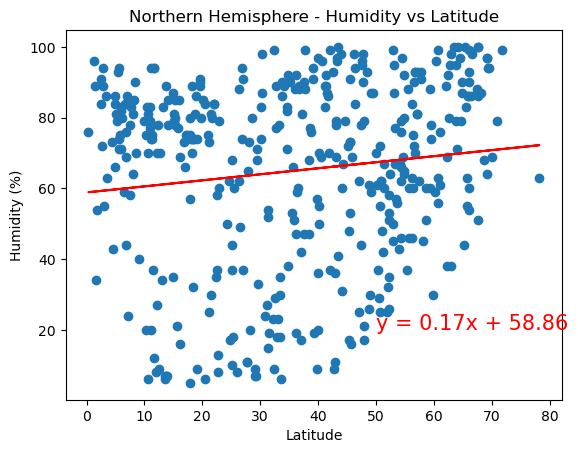

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                     "Northern Hemisphere - Humidity vs Latitude",
                     "Latitude", "Humidity (%)", (50, 20))

The r-value is: 0.172


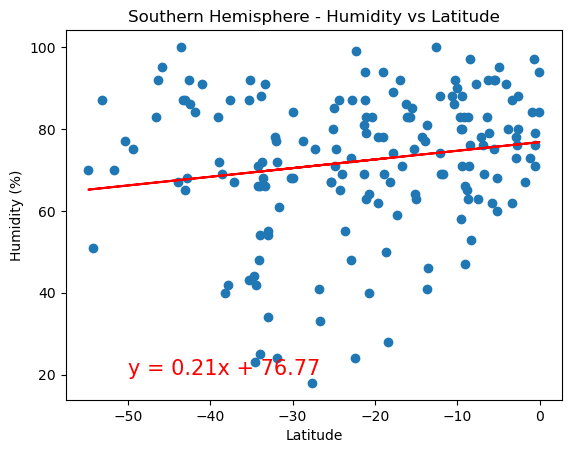

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                     "Southern Hemisphere - Humidity vs Latitude",
                     "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:** 
The Northern Hemisphere shows a small positive trend with a weak relationship based on the correlation value. humidity increases slightly as latitude increases.

The Southern Hemisphere also shows a weak relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.050


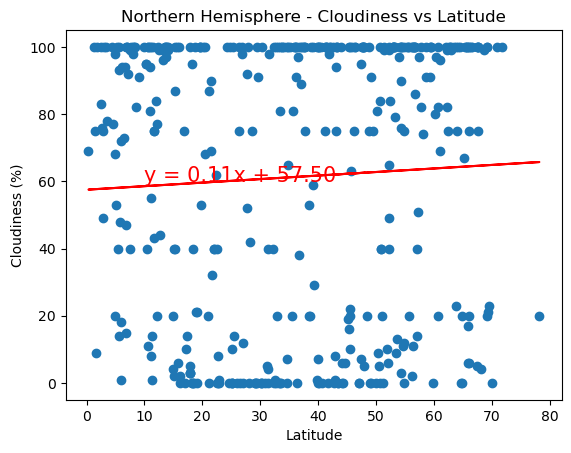

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                     "Northern Hemisphere - Cloudiness vs Latitude",
                     "Latitude", "Cloudiness (%)", (10, 60))

The r-value is: 0.103


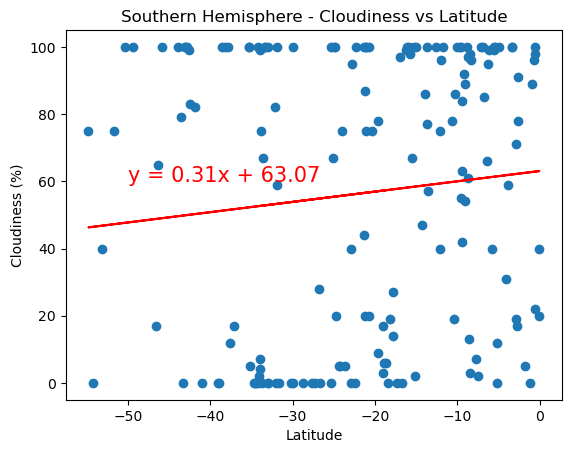

In [24]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                     "Southern Hemisphere - Cloudiness vs Latitude",
                     "Latitude", "Cloudiness (%)", (-50, 60))

**Discussion about the linear relationship:** 
The Northern Hemisphere Suggests a small positive trend. Cloudiness increases slightly as latitude increases. There is no clear relationship based on correlation.

The Southern Hemisphere correlation is slightly stronger than the Northern Hemisphere. It shows a weak positive trend.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.111


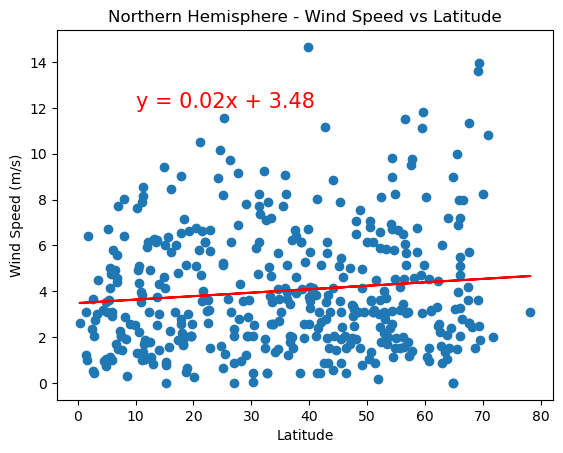

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                     "Northern Hemisphere - Wind Speed vs Latitude",
                     "Latitude", "Wind Speed (m/s)", (10, 12))

The r-value is: -0.225


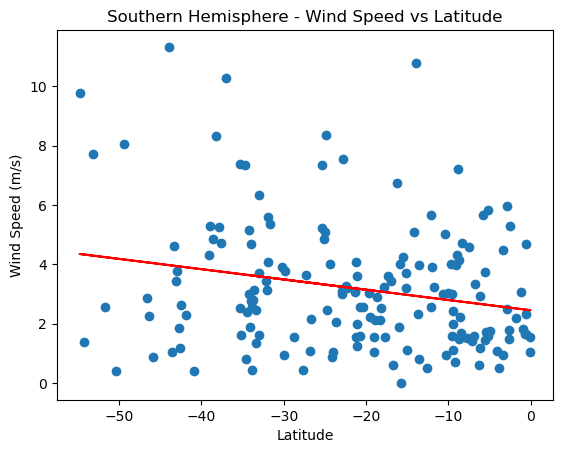

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                     "Southern Hemisphere - Wind Speed vs Latitude",
                     "Latitude", "Wind Speed (m/s)", (-50, 12))

**Discussion about the linear relationship:** 
Northern Hemisphere wind speed increases very slightly with latitude. The relationship is weak.

For the Southern Hemisphere The negative r-value (-0.225) implies wind speed decreases slightly